## PHYS 6260: Homework 6

In [35]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1: Fourier filtering and smoothing

### Part (a)

Read in the data from dow.txt, containing the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, a measure of average prices in the US stock market.

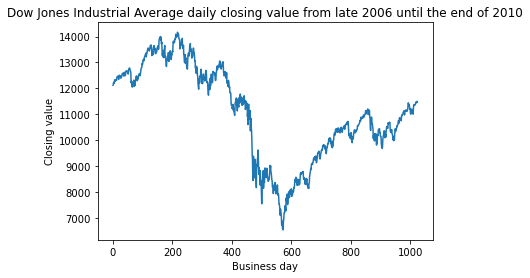

In [2]:
dow = np.loadtxt('dow.txt')
plt.plot(dow)
plt.xlabel("Business day")
plt.ylabel("Closing value")
plt.title("Dow Jones Industrial Average daily closing value from late 2006 until the end of 2010")
plt.show()

### Part (b)

The coefficients of the discrete Fourier transform of the data using the function rfft, which produces an array of $\frac{1}{2}N +1$ complex numbers:

In [3]:
coeff = np.fft.rfft(dow)
coeff

array([ 1.12839039e+07+0.00000000e+00j,  6.84127740e+05-9.55087519e+05j,
       -4.19226205e+05+9.29089562e+04j,  7.41901498e+04-2.73812250e+05j,
       -3.51856811e+04+7.23658613e+04j,  1.11482643e+05-3.14779807e+04j,
        2.16752824e+04-2.45751549e+04j,  1.11224416e+04+2.47975704e+04j,
        3.11884665e+04+2.27868210e+04j,  7.38523102e+03-3.21233427e+04j,
       -3.39615972e+04-1.07833052e+05j, -1.23569569e+04+2.73171276e+04j,
        2.13837315e+04-9.16684147e+04j, -4.32441725e+04+9.92294540e+04j,
       -3.55753518e+03-2.54972743e+04j, -3.04367677e+04-1.72551151e+04j,
       -9.31799610e+03-2.49297658e+04j, -9.35033325e+03-1.75612302e+04j,
        1.17418062e+04+2.09235370e+04j,  4.22549031e+04-2.38143067e+03j,
        1.35294835e+04-3.06720066e+04j,  4.06499470e+03-2.87140744e+04j,
       -1.56146318e+04+2.24811825e+04j,  1.35756353e+04-1.28123867e+04j,
        1.20484888e+04+3.50866363e+03j, -1.55111478e+04-1.70617041e+04j,
        8.98307189e+03+4.49546331e+03j,  4.42970647

### Part (c)

Now set all but the first 10% of the elements of this array to zero

In [4]:
for i in range(int(len(coeff)*10/100), len(coeff),1):
    coeff[i] = 0

### Part (d)

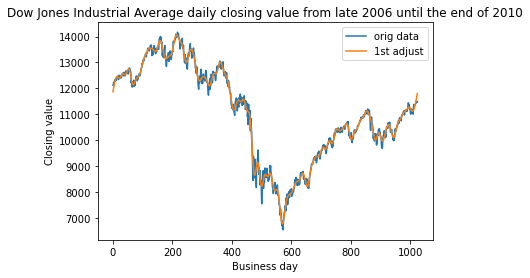

In [5]:
inverse1 = np.fft.irfft(coeff)
plt.plot(dow, label = 'orig data')
plt.plot(inverse1, label = '1st adjust')
plt.xlabel("Business day")
plt.ylabel("Closing value")
plt.title("Dow Jones Industrial Average daily closing value from late 2006 until the end of 2010")
plt.legend(loc = "upper right")
plt.show()

The inverse fourier transform has the same shape as the original data plot, but smoother. So, when I set the Fourier coefficients to 0, it smooths the function and lose the accuracy. 

### Part (e)

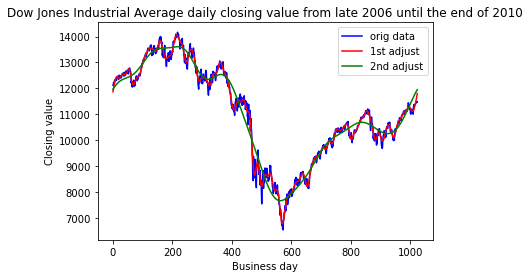

In [6]:
for i in range(int(len(coeff) / 50), len(coeff),1):
    coeff[i] = 0
    
inverse2 = np.fft.irfft(coeff)
plt.plot(dow,'b', label = 'orig data')
plt.plot(inverse1,'r', label = '1st adjust')
plt.plot(inverse2,'g', label = '2nd adjust')
plt.xlabel("Business day")
plt.ylabel("Closing value")
plt.title("Dow Jones Industrial Average daily closing value from late 2006 until the end of 2010")
plt.legend(loc = "upper right")
plt.show()

In general, this new plot still traces the original data plot, gives a basic trend, but much smoother and totally lose the accuracy. 

## Problem 2: The Lotka-Volterra equations

The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables x and y be proportional to the size of the populations of two species, traditionally called rabbits (the prey) and foxes (the predators). x and y are the population in thousands. Strictly, the only allowed values of x and y would be multiples of 0.001 since you can only have whole numbers of animals! But 0.001 is a pretty close spacing of values, so it's a decent approximation to treat x and y as continuous real numbers so long as neither gets very close to zero.

In the Lotka-Volterra model, the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
$$\frac{dx}{dt}=\alpha x -\beta xy,$$
where $\alpha$ and $\beta$ are constants. At the same time, the foxes reproduces at a rate proportional to the rate at which they eat rabbits-because they need food to grow and reproduce-but also die of old age at a rate proportional to their own population:
$$\frac{dy}{dt}=\gamma xy - \delta y,$$
where $\gamma$ and $\delta$ are also constants.

### Part (a)

This program uses the fourth-order Runge-Kutta method for the case ($\alpha = 1, \beta = \gamma = 1/2, \delta = 2$), starting from the initial condition x = y = 2. The program makes a graph showing both *x* and *y* as a function of time on the same axes from $t = 0 \rightarrow 30$

In [2]:
# constants
alpha = 1
beta = gamma = 1/2
delta = 2
x0 = y0 = 2

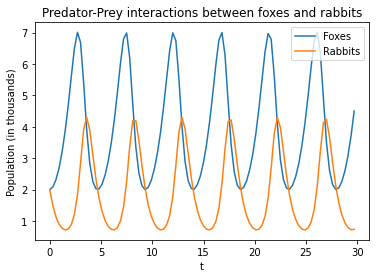

In [3]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return np.array([fx,fy], float)

a = 0
b = 30
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([x0,y0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3,t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6
    
plt.plot(tpoints, xpoints, label = 'Foxes')
plt.plot(tpoints, ypoints, label = 'Rabbits')
plt.xlabel('t')
plt.ylabel('Population (in thousands)')
plt.title('Predator-Prey interactions between foxes and rabbits')
plt.legend(loc = 'upper right')
plt.show()

### Part (b)

In this system, when predators' population (foxes) increases, their preys' population (rabbits) decreases. Eventually, when the preys become scarce, the predators' population starts decreasing due to natural selection (lack of food, only those strong predators will succeed). And then, this cycle will happen again and keep environment in balance between predator and prey. 

## Problem 3: The Lorenz equations

One of the most celebrated sets of differntial equations in physics is the Lorenz equations:
$$\frac{dx}{dt} = \sigma (y-x), \frac{dy}{dt} = rx - y - xz, \frac{dz}{dt} = xy - bz, $$
where $\sigma, r, $ and *b* are constants.


These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their frame is that they were one of the first incontrovertible examples of *deterministic chaos,* the occurrence of apparently random motion even though there is no randomness built into the equations. 

### Part (a)

In [9]:
# constants
sigma = 10
rr = 28
bb = 8/3
x0, y0, z0 = 0, 1, 0

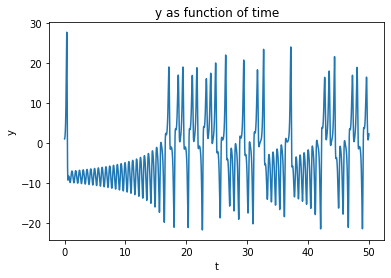

In [10]:
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = rr*x - y - x*z
    fz = x*y - bb*z
    return np.array([fx,fy,fz], float)

a = 0
b = 50
N = 10000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = np.array([x0, y0, z0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6

plt.plot(tpoints,ypoints, label = 'y')
plt.xlabel('t')
plt.ylabel('y')
plt.title('y as function of time')
plt.show()

The pattern is totally unpredictable.

### Part (b)

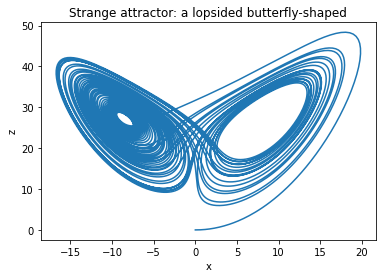

In [11]:
plt.plot(xpoints,zpoints)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Strange attractor: a lopsided butterfly-shaped") 
plt.show()

## Problem 4: Orbit the Earth

Use the Verlet method to calculate the orbit of the Earth around the Sun. The equations of motion for the position **b** = $(x,y)$ of the planet in its orbital plane are the same as those for any orbiting body and are easily derived. In vector form, they are
$$\frac{d^2 \textbf{r}}{dt^2} = -GM\frac{\textbf{r}}{r^3}$$
where $G = 6.6738 \times 10^{-11} m^3 kg^{-1}s^{-2}$ is Newton's gravitational constant and $M = 1.9891 \times 10^{30}$ kg is the mass of the Sun. 

The orbit of the Earth is not perfectly circular, the planet being sometimes closer to and sometimes farther from the Sun. When it's at its closest point, the *perihelion*, it is moving precisely trangetially, and it has a distance $1.4710 \times 10^{11}$ m from the Sun and a linear velocity 30.287 km/s.

In [25]:
# constants
year = 8760*60*60
GG = 6.6738e-11
G =  GG * year**2
M = 1.9891e30 
m = 5.9722e24 

x0, y0 = 1.4710e11, 0
vx0, vy0 = 0, 30.287e3*year

a = 0
b = 5
h = 1/8760

### Part (a)

Calculate the orbit of the Earth using the Verlet method with a timestep h = 1 hour

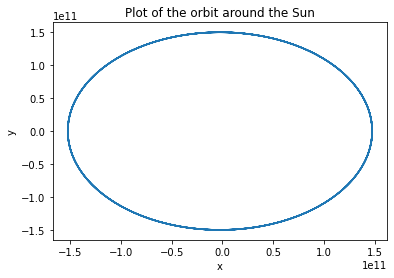

In [26]:
def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    rr = np.sqrt(x**2 + y**2)
    fx = -G*M*x / rr**3
    fy = -G*M*y / rr**3
    return np.array([vx,fx,vy,fy], float)


tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([x0,vx0,y0,vy0], float)

# calculate half steps - 8.77
vxh = r[1] + h*f(r)[1]/2
vyh = r[3] + h*f(r)[3]/2

# 8.78
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    r[0] += h*vxh
    r[2] += h*vyh
    k = h*f(r)
    r[1] = vxh + k[1]/2
    r[3] = vyh + k[3]/2
    vxh += k[1]
    vyh += k[3]

plt.plot(xpoints,ypoints)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the orbit around the Sun')
plt.show()

### Part (b)

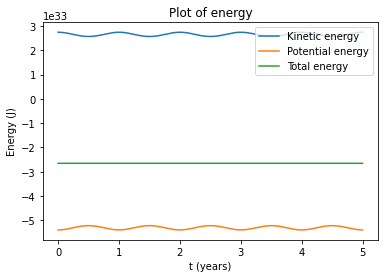

In [30]:
def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    rr = np.sqrt(x**2 + y**2)
    fx = -G*M*x / rr**3
    fy = -G*M*y / rr**3
    return np.array([vx,fx,vy,fy], float)


tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
PE = []
KE = []

r = np.array([x0,vx0,y0,vy0], float)

# calculate half steps - 8.77
vxh = r[1] + h*f(r)[1]/2
vyh = r[3] + h*f(r)[3]/2

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    PE.append(-GG*M*m / np.sqrt(r[0]**2 + r[2]**2))
    KE.append((m*(r[1]**2 + r[3]**2)/ year**2)/2)
    r[0] += h*vxh
    r[2] += h*vyh
    k = h*f(r)
    r[1] = vxh + k[1]/2
    r[3] = vyh + k[3]/2
    vxh += k[1]
    vyh += k[3]

TE = np.array(KE) + np.array(PE)
plt.plot(tpoints, KE, label = 'Kinetic energy')
plt.plot(tpoints, PE, label = 'Potential energy')
plt.plot(tpoints, TE, label = 'Total energy')
plt.xlabel('t (years)')
plt.ylabel('Energy (J)')
plt.title('Plot of energy')
plt.legend(loc = 'upper right')
plt.show()

### Part (c)

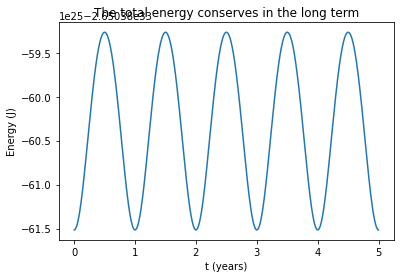

In [36]:
plt.plot(tpoints, TE)
plt.xlabel('t (years)')
plt.ylabel('Energy (J)')
plt.title('The total energy conserves in the long term')
plt.show()

## Problem 5: Oscillating chemical reactions

The *Belousov-Zhabotinsky* reaction is a chemical oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. You can add an indicator dye to the reason which changes color depending on the concentrations and watch the mixture switch back and forth between two different colors for as long as you go on heating the mixture.

Physicist Ilya Prigogine formulated a methematical model of this type of chemical oscilator, which he called the "Brusselator" after his hometown of Brussels. The equations for the Brusselator are 
$$\frac{dx}{dt} = 1 - (b+1)x + ax^2y, \frac{dy}{dt} = bx - ax^2y$$
Here *x* and *y* represent concentrations of chemicals and *a* and *b* are positive constants.

In [36]:
# constants
a = 1
b = 3
x0, y0 = 0, 0
delta = 1e-10
t0 = 0
tf = 20
H = 20
n = 8

In [50]:
r = np.array([x0,y0], float)
xpoints = []
ypoints = []
tpoints = []

# This program uses the adaptive Bulirsh-Stoer method until either the caluclation converges to the required accuracy
# or reach the maximum H.
# If fail, the program calls itself, twice, to calculate separately the solution for the first and then second half 

def Stoer(r, t, H):
    
    #initial required variable and calculate modified midpoint 
    def frn(r, n):
           
        def f(r):
            x = r[0]
            y = r[1]
            fx = 1 - (b+1)*x + a*x**2*y
            fy = b*x - a*x**2*y
            return np.array([fx,fy], float)

        r2 = np.array(r,float)
        h = H/n
        
        r1 = r2 + 0.5*h*f(r2)
        r2 += h*f(r1)
        for i in range(n - 1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        return (r1 + r2 + 0.5*h*f(r2))/2

    #if n>H, call itself twice
    #otherwise, calculate x and y
    def RR(R1, n):
        if n > 8:
            return Stoer(Stoer(r,t,H/2), t+H/2, H/2)
        else:
            R2 = [frn(r,n)]
            for m in range(1, n):
                epsilon = (R2[m-1]-R1[m-1]) / ((n/(n-1))**(2*m)-1)
                R2.append(R2[m-1] + epsilon)

            if np.sqrt(epsilon[0]**2 + epsilon[1]**2) < H*delta:
                xpoints.append(R2[n - 1][0])
                ypoints.append(R2[n - 1][1])
                tpoints.append(t+H)
                return R2[n - 1]
            else:
                return RR(R2, n + 1)


    return RR(np.array([frn(r, 1)], float), 2)

<ipython-input-50-43511b6e1b2d>:18: RuntimeWarning: overflow encountered in double_scalars
  fx = 1 - (b+1)*x + a*x**2*y
<ipython-input-50-43511b6e1b2d>:19: RuntimeWarning: overflow encountered in double_scalars
  fy = b*x - a*x**2*y
<ipython-input-50-43511b6e1b2d>:31: RuntimeWarning: invalid value encountered in add
  return (r1 + r2 + 0.5*h*f(r2))/2
<ipython-input-50-43511b6e1b2d>:44: RuntimeWarning: overflow encountered in double_scalars
  if np.sqrt(epsilon[0]**2 + epsilon[1]**2) < H*delta:
<ipython-input-50-43511b6e1b2d>:41: RuntimeWarning: invalid value encountered in subtract
  epsilon = (R2[m-1]-R1[m-1]) / ((n/(n-1))**(2*m)-1)


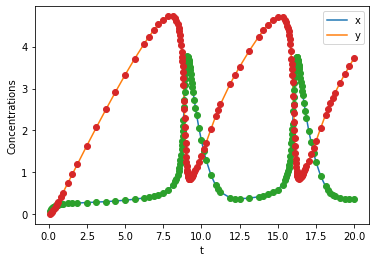

In [51]:
Stoer(r,t0,H)

plt.plot(tpoints, xpoints, label='x')
plt.plot(tpoints, ypoints, label='y')
plt.plot(tpoints, xpoints,'o')
plt.plot(tpoints, ypoints,'o')
plt.xlabel('t')
plt.ylabel('Chemical concentrations')
plt.legend(loc = 'upper right')
plt.show()